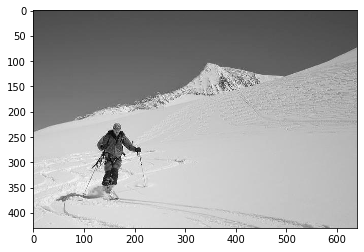

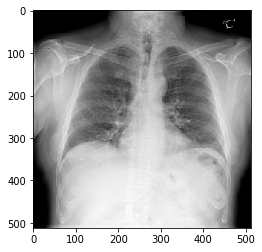

In [1]:
from skimage import data
import matplotlib.pyplot as plt
from skimage import io

a=io.imread('000000038118.jpg',as_gray=True)
b=io.imread('CXR7_IM-2263-1001.png',as_gray=True)

plt.imshow(a,cmap='gray',interpolation='nearest')
plt.show()
plt.imshow(b, cmap='gray', interpolation='nearest') 
plt.show()

In [2]:
from models.lip import LIPImage,LIPSpace
from models.hlip import HLIPImage,HLIPSpace
from models.pslip import PSLIPImage,PSLIPSpace

In [3]:
import numpy as np
from skimage.filters import prewitt

### Lineal

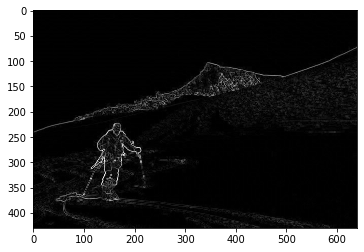

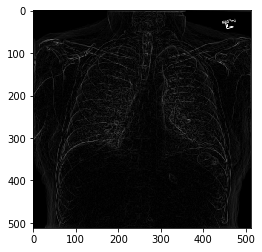

In [4]:
la=np.array(a.tolist())

sla=prewitt(la)

plt.imshow(sla,cmap='gray',interpolation='nearest')
plt.show()

lb=np.array(b.tolist())

slb=prewitt(lb)

plt.imshow(slb,cmap='gray',interpolation='nearest')
plt.show()

### LIP

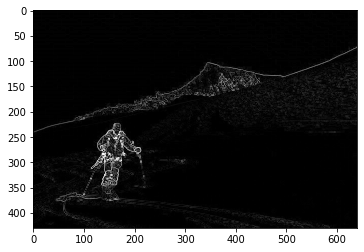

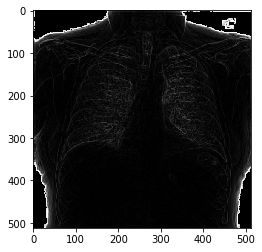

In [5]:
js=LIPSpace()

ja=js.equation(js.gray_tone(a))

sja=js.M-js.inverse_gray_tone(js.inverse_equation(prewitt(ja)))

plt.imshow(sja,cmap='gray',interpolation='nearest')
plt.show()

js2=LIPSpace(1)

jb=js2.equation(js2.gray_tone(b))

sjb=js2.M-js2.inverse_gray_tone(js2.inverse_equation(prewitt(jb)))

plt.imshow(sjb,cmap='gray',interpolation='nearest')
plt.show()

### HLIP

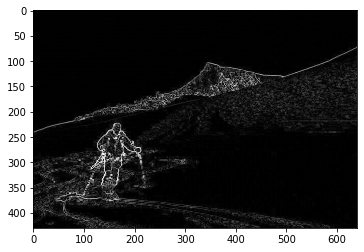

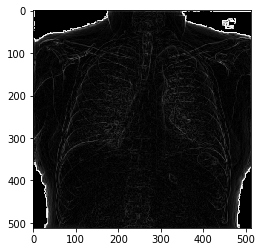

In [6]:

hs=HLIPSpace()

ha=hs.equation(hs.gray_tone(a))

sha=hs.inverse_gray_tone(hs.inverse_equation(prewitt(ha)))

plt.imshow(sha,cmap='gray',interpolation='nearest')
plt.show()

hs2=HLIPSpace(1)

hb=hs2.equation(hs2.gray_tone(b))

shb=hs2.inverse_gray_tone(hs2.inverse_equation(prewitt(hb)))

plt.imshow(shb,cmap='gray',interpolation='nearest')
plt.show()

### PSLIP

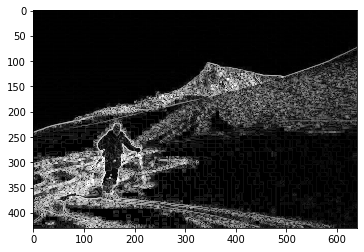

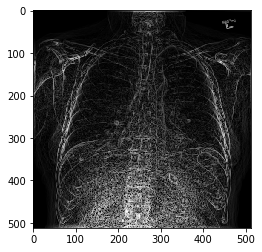

In [7]:

pss=PSLIPSpace()

psa=pss.equation(pss.gray_tone(a))

spsa=pss.inverse_gray_tone(pss.inverse_equation(prewitt(psa)))

plt.imshow(spsa,cmap='gray',interpolation='nearest')
plt.show()

pss2=PSLIPSpace(1)

psb=pss2.equation(pss2.gray_tone(b))

spsb=pss2.inverse_gray_tone(pss2.inverse_equation(prewitt(psb)))

plt.imshow(spsb,cmap='gray',interpolation='nearest')
plt.show()